<a href="https://colab.research.google.com/github/ogd0ug/mba/blob/main/Exercicio%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercício de Programação


##Importamos bibliotecas e dados necessários

In [1]:
import pandas as pd
import numpy as np

###Importamos dados Kaggle

In [11]:
files_path = '/content/drive/MyDrive/Dynamic_ML'

sales_data = pd.read_csv(f'{files_path}/sales_train_validation.csv')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Cruzamento dos dados para dataset único

In [12]:
# Filter rows where 'id' column contains 'FOODS'
filtered_sales_data = sales_data[sales_data['id'].str.contains('FOODS')]
filtered_sales_data = filtered_sales_data[sales_data['state_id'].str.contains('CA')]

np.random.seed(0) # We fix the seed to aways have the same sample selection

# Sample 5 unique store IDs
unique_item_ids = filtered_sales_data['item_id'].unique()
unique_item_ids = np.random.choice(unique_item_ids, 10, replace=False)

filtered_sales_data = filtered_sales_data[filtered_sales_data['item_id'].isin(unique_item_ids)]

sales_data = filtered_sales_data.copy()
sales_data.reset_index(drop=True, inplace=True)

del filtered_sales_data

<ipython-input-12-382ccd6a69a7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_sales_data = filtered_sales_data[sales_data['state_id'].str.contains('CA')]


In [13]:
sales_data.head()

id      item_id  dept_id cat_id store_id state_id  \
0  FOODS_1_036_CA_1_validation  FOODS_1_036  FOODS_1  FOODS     CA_1       CA   
1  FOODS_1_054_CA_1_validation  FOODS_1_054  FOODS_1  FOODS     CA_1       CA   
2  FOODS_2_018_CA_1_validation  FOODS_2_018  FOODS_2  FOODS     CA_1       CA   
3  FOODS_2_273_CA_1_validation  FOODS_2_273  FOODS_2  FOODS     CA_1       CA   
4  FOODS_2_303_CA_1_validation  FOODS_2_303  FOODS_2  FOODS     CA_1       CA   

   d_1  d_2  d_3  d_4  ...  d_1904  d_1905  d_1906  d_1907  d_1908  d_1909  \
0    3    2    4    3  ...       4       4       0       2       4       3   
1    0    1    0   11  ...       0       0       3       6       0       3   
2    1    0    0    0  ...       0       3       0       0       0       1   
3    0    0    0    0  ...       0       3       1       1       0       0   
4    0    0    0    0  ...       0       0       0       0       0       0   

   d_1910  d_1911  d_1912  d_1913  
0       5       3       6       3  
1       2       3       2       1  
2       0       2       0       1  
3       0       0       1       3  
4       0       0       0       0  

[5 rows x 1919 columns]

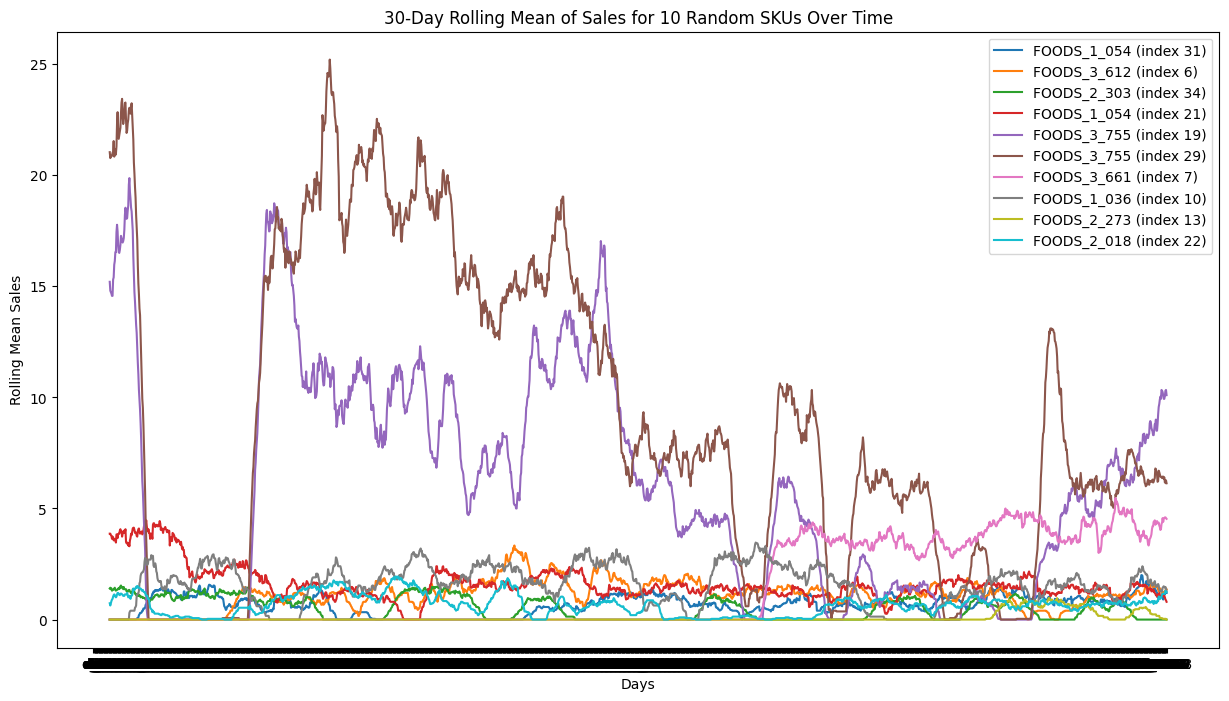

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'sales_data' is already loaded and contains columns like 'd_1', 'd_2', etc., representing daily sales

# Filter out non-sales columns
sales_only = sales_data.filter(regex='^d_', axis=1)

# Select 10 random SKUs
selected_skus_indices = np.random.choice(sales_data.index, 10, replace=False)
selected_skus_data = sales_only.loc[selected_skus_indices]

# Define the window for rolling mean
rolling_window = 30  # for example, a 30-day rolling window

# Plotting
plt.figure(figsize=(15, 8))
for i, sku_index in enumerate(selected_skus_indices):
    sku_id = sales_data.loc[sku_index, 'item_id']
    rolling_mean = selected_skus_data.loc[sku_index, :].rolling(window=rolling_window).mean()
    plt.plot(selected_skus_data.columns, rolling_mean, label=f'{sku_id} (index {sku_index})')

plt.title(f'30-Day Rolling Mean of Sales for 10 Random SKUs Over Time')
plt.xlabel('Days')
plt.ylabel('Rolling Mean Sales')
plt.legend()
plt.show()

del selected_skus_data
del selected_skus_indices
del sales_only

In [15]:
# Melt the sales data to long format
sales_long = pd.melt(sales_data,
                     id_vars=['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
                     var_name='day',
                     value_name='sale_qty')

# Extracting day numbers and converting to float first to handle NaN values
sales_long['day'] = sales_long['day'].str.extract('(\d+)').astype(float)

# You can check if there are any NaN values and handle them as needed
nan_count = sales_long['day'].isna().sum()
if nan_count > 0:
    print(f"There are {nan_count} NaN values in the 'day' column")

# Assuming we can drop NaN values (or you can handle them differently)
sales_long = sales_long.dropna(subset=['day'])

# Now safely convert to int
sales_long['day'] = sales_long['day'].astype(int)

sales_long.reset_index(drop=True, inplace=True)

del sales_data

There are 40 NaN values in the 'day' column


In [16]:
calendar_data = pd.read_csv(f'{files_path}/calendar.csv')

In [17]:
# Convert 'date' in the calendar DataFrame to a sequential day number
calendar_data['day'] = pd.to_datetime(calendar_data['date']).sub(pd.to_datetime(calendar_data['date'].iloc[0])).dt.days + 1

# Preview the calendar data
calendar_data.head()

date  wm_yr_wk    weekday  wday  month  year    d event_name_1  \
0  2011-01-29     11101   Saturday     1      1  2011  d_1          NaN   
1  2011-01-30     11101     Sunday     2      1  2011  d_2          NaN   
2  2011-01-31     11101     Monday     3      1  2011  d_3          NaN   
3  2011-02-01     11101    Tuesday     4      2  2011  d_4          NaN   
4  2011-02-02     11101  Wednesday     5      2  2011  d_5          NaN   

  event_type_1 event_name_2 event_type_2  snap_CA  snap_TX  snap_WI  day  
0          NaN          NaN          NaN        0        0        0    1  
1          NaN          NaN          NaN        0        0        0    2  
2          NaN          NaN          NaN        0        0        0    3  
3          NaN          NaN          NaN        1        1        0    4  
4          NaN          NaN          NaN        1        0        1    5

In [18]:
# Merge the sales_long and calendar DataFrames
merged_data_calendar = pd.merge(sales_long, calendar_data, on='day', how='left')
del calendar_data
del sales_long

In [19]:
price_data = pd.read_csv(f'{files_path}/sell_prices.csv')

In [20]:
# Merge sales and price data
merged_data = pd.merge(merged_data_calendar, price_data, on=['item_id', 'store_id', 'wm_yr_wk'], how='left')
del price_data
del merged_data_calendar

In [21]:
# Count the number of unique item_ids in the filtered_data DataFrame
unique_item_id_count = merged_data['item_id'].nunique()

# Print the count
print(f"Number of unique item_ids: {unique_item_id_count}")
del unique_item_id_count

Number of unique item_ids: 10


In [22]:
merged_data.columns

Index(['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'day',
       'sale_qty', 'date', 'wm_yr_wk', 'weekday', 'wday', 'month', 'year', 'd',
       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2',
       'snap_CA', 'snap_TX', 'snap_WI', 'sell_price'],
      dtype='object')

##Pré-Processamento

###Tratamento básico dos tipos de variáveis

In [23]:
# Identify the item_id with all NaN prices
item_ids_with_all_nan_prices = merged_data.groupby('item_id')['sell_price'].apply(lambda x: x.isna().all())

# Filtering out the item_ids to exclude (those with all NaN dates)
item_ids_to_exclude = item_ids_with_all_nan_prices[item_ids_with_all_nan_prices].index.tolist()

# Now filter out these item_ids from the merged_data
filtered_data = merged_data[~merged_data['item_id'].isin(item_ids_to_exclude)]

# Preview the filtered data
filtered_data.head()

item_id  dept_id cat_id store_id state_id  day sale_qty        date  \
0  FOODS_1_036  FOODS_1  FOODS     CA_1       CA    1        3  2011-01-29   
1  FOODS_1_054  FOODS_1  FOODS     CA_1       CA    1        0  2011-01-29   
2  FOODS_2_018  FOODS_2  FOODS     CA_1       CA    1        1  2011-01-29   
3  FOODS_2_273  FOODS_2  FOODS     CA_1       CA    1        0  2011-01-29   
4  FOODS_2_303  FOODS_2  FOODS     CA_1       CA    1        0  2011-01-29   

   wm_yr_wk   weekday  ...  year    d  event_name_1 event_type_1 event_name_2  \
0     11101  Saturday  ...  2011  d_1           NaN          NaN          NaN   
1     11101  Saturday  ...  2011  d_1           NaN          NaN          NaN   
2     11101  Saturday  ...  2011  d_1           NaN          NaN          NaN   
3     11101  Saturday  ...  2011  d_1           NaN          NaN          NaN   
4     11101  Saturday  ...  2011  d_1           NaN          NaN          NaN   

  event_type_2 snap_CA snap_TX  snap_WI  sell_price  
0          NaN       0       0        0        1.50  
1          NaN       0       0        0        1.68  
2          NaN       0       0        0        6.98  
3          NaN       0       0        0         NaN  
4          NaN       0       0        0         NaN  

[5 rows x 22 columns]

In [24]:
# Count the number of unique item_ids in the filtered_data DataFrame
unique_item_id_count = filtered_data['item_id'].nunique()

# Print the count
print(f"Number of unique item_ids: {unique_item_id_count}")

Number of unique item_ids: 10


In [25]:
# Ensure the data is sorted by date
filtered_data.sort_values(by='date', inplace=True)

# Create two Series: one filled forward and one filled backward
forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')

# Combine the results, preferring the forward fill
combined_fill = forward_filled.combine_first(backward_filled)

# Assign the combined result back to the sell_price column
filtered_data['sell_price'] = combined_fill

<ipython-input-25-a53922f40426>:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-25-a53922f40426>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-25-a53922f40426>:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')
<ipython-input-25-a53922f40426>:6:

In [26]:
# Check if there are any remaining NaN values in sell_price
remaining_nan = filtered_data['sell_price'].isna().sum()
print(f"Remaining NaN values in sell_price: {remaining_nan}")

Remaining NaN values in sell_price: 0


In [27]:
del combined_fill
del backward_filled
del forward_filled
del item_ids_to_exclude
del item_ids_with_all_nan_prices

In [28]:
categorical_columns = ['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id',
                       'event_name_1', 'event_type_1', 'event_name_2', 'event_type_2']

for col in categorical_columns:
    filtered_data[col] = filtered_data[col].astype('category').cat.codes

In [29]:
filtered_data['year'] = filtered_data['year'] - filtered_data['year'].min()

In [30]:
filtered_data['weekday'] = filtered_data['weekday'].astype('category').cat.codes

In [31]:
data = filtered_data

In [32]:
window_sizes_lag = [1, 2, 3, 4, 5, 6, 7, 14, 30, 60]

for window in window_sizes_lag:
    data[f'lag_{window}'] = data.groupby(['item_id', 'store_id'])['sale_qty'].shift(window)

In [33]:
window_sizes_rolling = [2, 3, 4, 7, 14, 30, 60]

for window in window_sizes_rolling:
    rolling_mean = data.groupby(['item_id', 'store_id'])['sale_qty'].transform(lambda x: x.rolling(window=window).mean())
    rolling_sum = data.groupby(['item_id', 'store_id'])['sale_qty'].transform(lambda x: x.rolling(window=window).sum())

    data[f'rolling_mean_{window}'] = rolling_mean
    data[f'rolling_sum_{window}'] = rolling_sum

In [34]:
# Handling NaN values
data.dropna(inplace=True)
data.drop(['d'],axis = 1,inplace=True)

In [35]:
# Set option to display all columns
pd.set_option('display.max_columns', None)
data[(data['item_id'] == 1) & (data['store_id'] == 1)].head(5)

item_id  dept_id  cat_id  store_id  state_id  day sale_qty        date  \
2411        1        0       0         1         0   61        5  2011-03-30   
2451        1        0       0         1         0   62        7  2011-03-31   
2491        1        0       0         1         0   63        5  2011-04-01   
2531        1        0       0         1         0   64        3  2011-04-02   
2571        1        0       0         1         0   65       11  2011-04-03   

      wm_yr_wk  weekday  wday  month  year  event_name_1  event_type_1  \
2411     11109        6     5      3     0            -1            -1   
2451     11109        4     6      3     0            -1            -1   
2491     11109        0     7      4     0            -1            -1   
2531     11110        2     1      4     0            -1            -1   
2571     11110        3     2      4     0            -1            -1   

      event_name_2  event_type_2  snap_CA  snap_TX  snap_WI  sell_price lag_1  \
2411            -1            -1        0        0        0        1.68     5   
2451            -1            -1        0        0        0        1.68     5   
2491            -1            -1        1        1        0        1.68     7   
2531            -1            -1        1        0        1        1.68     5   
2571            -1            -1        1        1        1        1.68     3   

     lag_2 lag_3 lag_4 lag_5 lag_6 lag_7 lag_14 lag_30 lag_60  rolling_mean_2  \
2411     3    13    10     5     3     2      7      6      4             5.0   
2451     5     3    13    10     5     3      2     10      6             6.0   
2491     5     5     3    13    10     5      6      3      8             6.0   
2531     7     5     5     3    13    10      9      4      5             4.0   
2571     5     7     5     5     3    13      5      0      4             7.0   

      rolling_sum_2  rolling_mean_3  rolling_sum_3  rolling_mean_4  \
2411           10.0        4.333333           13.0             6.5   
2451           12.0        5.666667           17.0             5.0   
2491           12.0        5.666667           17.0             5.5   
2531            8.0        5.000000           15.0             5.0   
2571           14.0        6.333333           19.0             6.5   

      rolling_sum_4  rolling_mean_7  rolling_sum_7  rolling_mean_14  \
2411           26.0        6.285714           44.0         5.642857   
2451           20.0        6.857143           48.0         6.000000   
2491           22.0        6.857143           48.0         5.928571   
2531           20.0        5.857143           41.0         5.500000   
2571           26.0        5.571429           39.0         5.928571   

      rolling_sum_14  rolling_mean_30  rolling_sum_30  rolling_mean_60  \
2411            79.0         5.200000           156.0         5.200000   
2451            84.0         5.100000           153.0         5.216667   
2491            83.0         5.166667           155.0         5.166667   
2531            77.0         5.133333           154.0         5.133333   
2571            83.0         5.500000           165.0         5.250000   

      rolling_sum_60  
2411           312.0  
2451           313.0  
2491           310.0  
2531           308.0  
2571           315.0

In [36]:
# Ensure the data is sorted by date
filtered_data.sort_values(by='date', inplace=True)

# Create two Series: one filled forward and one filled backward
forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')

# Combine the results, preferring the forward fill
combined_fill = forward_filled.combine_first(backward_filled)

# Assign the combined result back to the sell_price column
filtered_data['sell_price'] = combined_fill

<ipython-input-36-a53922f40426>:5: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-36-a53922f40426>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  forward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='ffill')
<ipython-input-36-a53922f40426>:6: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  backward_filled = filtered_data.groupby('item_id')['sell_price'].fillna(method='bfill')
<ipython-input-36-a53922f40426>:6:

###Quebra em conjunto de treino e teste

In [37]:
import pandas as pd

# Assuming 'data' is your DataFrame

# Create the target variable (next day's sale_qty)
data['target'] = data.groupby(['item_id', 'store_id'])['sale_qty'].shift(-1)

# Drop rows with NaN in target due to the shift operation
data.dropna(subset=['target'], inplace=True)

# Splitting the data into features and target
X = data.drop(['target', 'wm_yr_wk', 'date'], axis=1)
y = data['target']

# Lists to store individual DataFrames for concatenation
X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

# Split index for each series
split_ratio = 0.8

for (item, store), group in data.groupby(['item_id', 'store_id']):
    split_index = int(len(group) * split_ratio)

    X_train_list.append(group.iloc[:split_index].drop(['target', 'wm_yr_wk', 'date'], axis=1))
    X_test_list.append(group.iloc[split_index:].drop(['target', 'wm_yr_wk', 'date'], axis=1))
    y_train_list.append(group.iloc[:split_index]['target'])
    y_test_list.append(group.iloc[split_index:]['target'])

# Concatenate all individual DataFrames
X_train = pd.concat(X_train_list)
X_test = pd.concat(X_test_list)
y_train = pd.concat(y_train_list)
y_test = pd.concat(y_test_list)


In [38]:
from sklearn.preprocessing import StandardScaler

# List of continuous columns to scale
non_continuous_columns = categorical_columns + ['d', 'date','wm_yr_wk']

continuous_columns = X_train.columns.difference(non_continuous_columns)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the continuous variables of the training data
scaler.fit(X_train[continuous_columns])

# Transform the continuous variables in both training and test sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[continuous_columns] = scaler.transform(X_train[continuous_columns])
X_test_scaled[continuous_columns] = scaler.transform(X_test[continuous_columns])

In [39]:
# Convert features to numeric type
numeric_features = ['sale_qty', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_14', 'lag_30', 'lag_60']
X_train[numeric_features] = X_train[numeric_features].apply(pd.to_numeric, errors='coerce')
X_test[numeric_features] = X_test[numeric_features].apply(pd.to_numeric, errors='coerce')

# After converting, you may need to drop NaN values that were introduced during conversion
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)

# Convert the target variable to numeric type
y_train = pd.to_numeric(y_train, errors='coerce')
y_test = pd.to_numeric(y_test, errors='coerce')

# After converting, you may need to drop NaN values that were introduced during conversion
y_train.dropna(inplace=True)
y_test.dropna(inplace=True)

#Execução do Exercício

##Análise das séries de tempo

###Decomposição da série temporal

Realize a decomposição da série temporal na 4 componentes apresentadas em aula

In [40]:
# Ciclo: São oscilações que aparecem de forma mais irregular, sem intervalo algum. Geralmente aafeta os dados por períodos mais longos.

# Ruído: Variações aleatórios que não seguem padrão, é como uma bagunça que não conseguimos prever.

# Tendência: É o movimento em geral, mostra se os dados estão subindo, descendo ou se mantendo estáveis.

# Sazonalidade: são os padrões que se repetem em intervalos regulares, como algum evento anual etc.

SyntaxError: invalid syntax (<ipython-input-40-a6f167a86c39>, line 1)

Escreva uma discussão em torno das características desta série de tempo.

As quatro séries mostram uma tendência de crescimento, com números subindo ao longo do tempo, talvez por uma demanda maior. Dá pra ver picos sazonais em certas épocas, como datas festivas, e em algumas séries esses padrões são menos óbvios. Os ciclos aparecem de vez em quando, sem um ritmo fixo, e podem ser influenciados por coisas externas. Já o ruído são as variações imprevisíveis, mais intensas em algumas séries que em outras. Entender tudo isso ajuda a planejar melhor, aproveitando picos e lidando com os altos e baixos.

###Tipo de modelo clássico

Qual tipo de modelo melhor descreve a série de tempo? Multiplicativo ou aditivo?

In [ ]:
"""
Resposta: auditiva

"""

Resposta:

##ARIMA

Vamos realizar a previsão da série de tempo dos 10 produtos diferentes usando ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


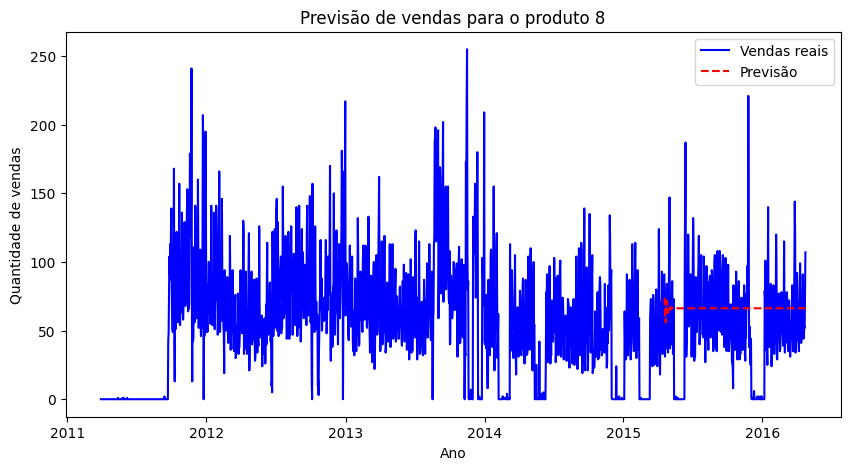

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


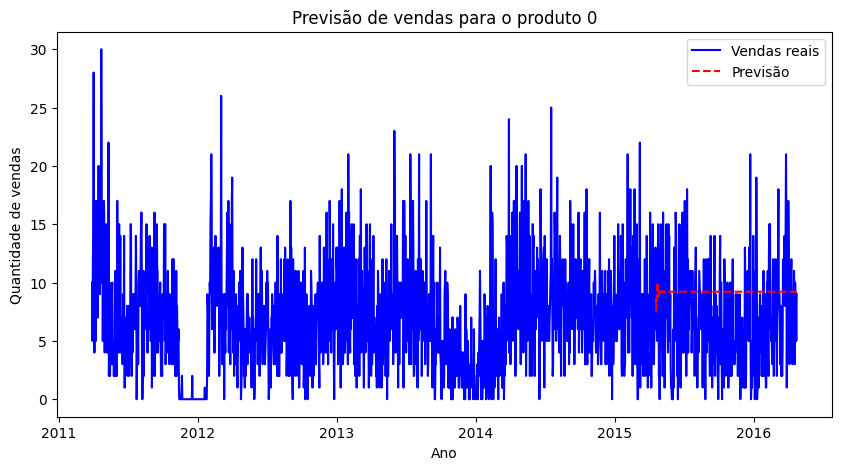

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


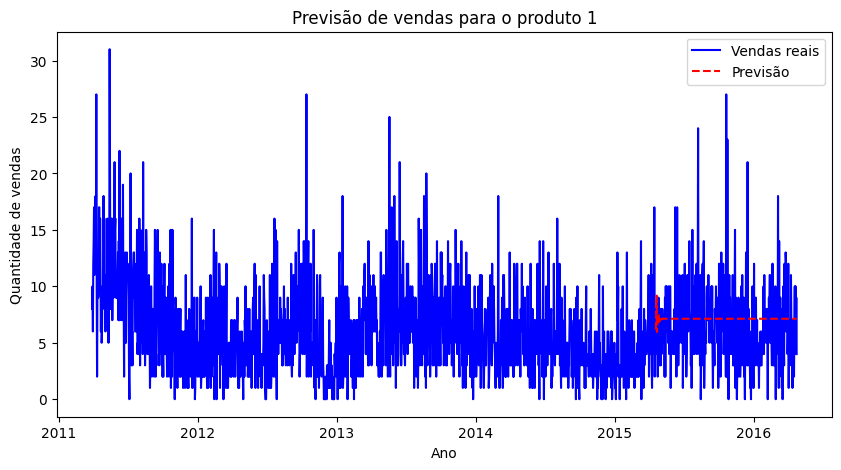

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


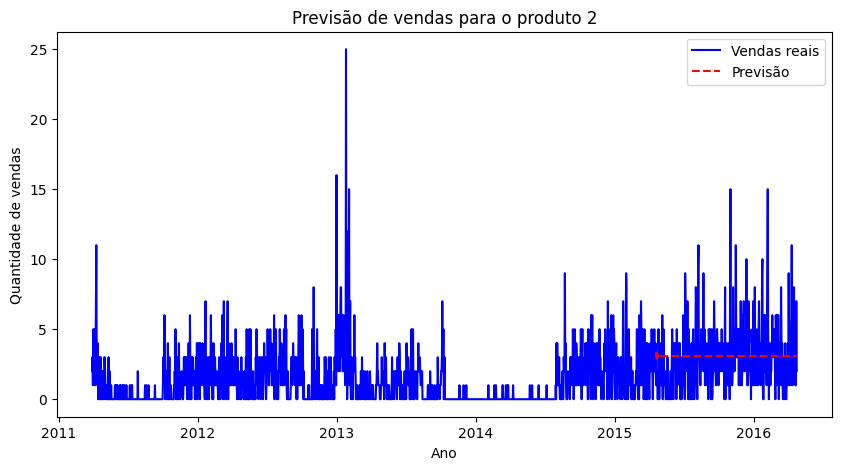

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


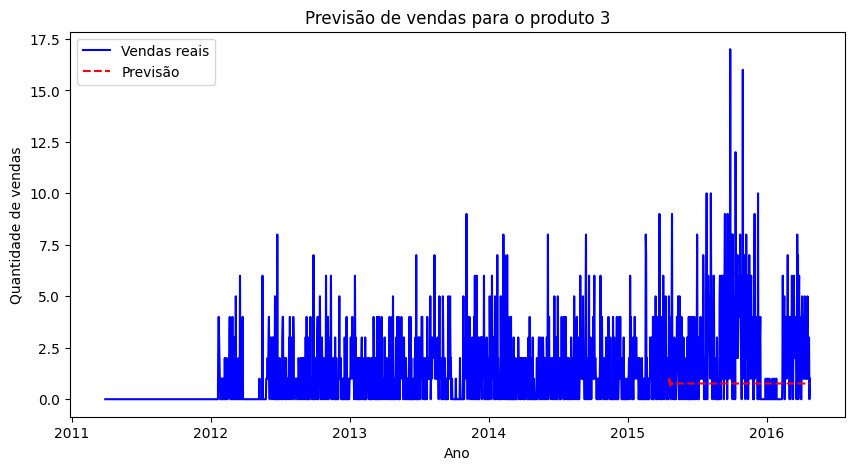

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


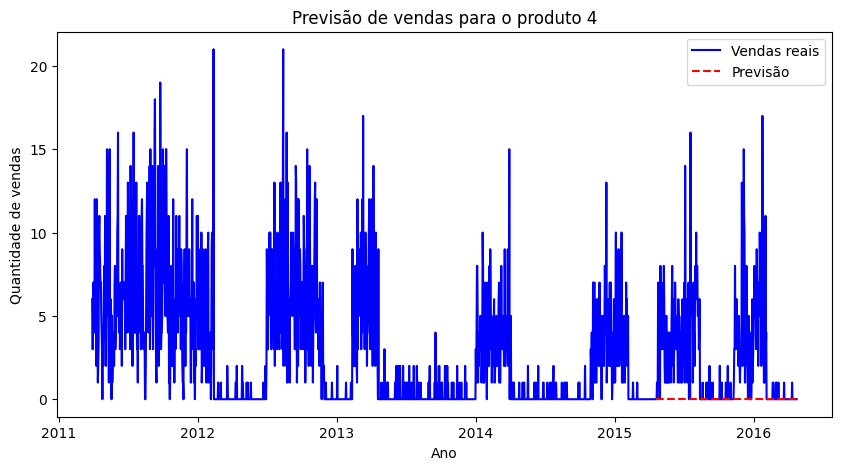

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


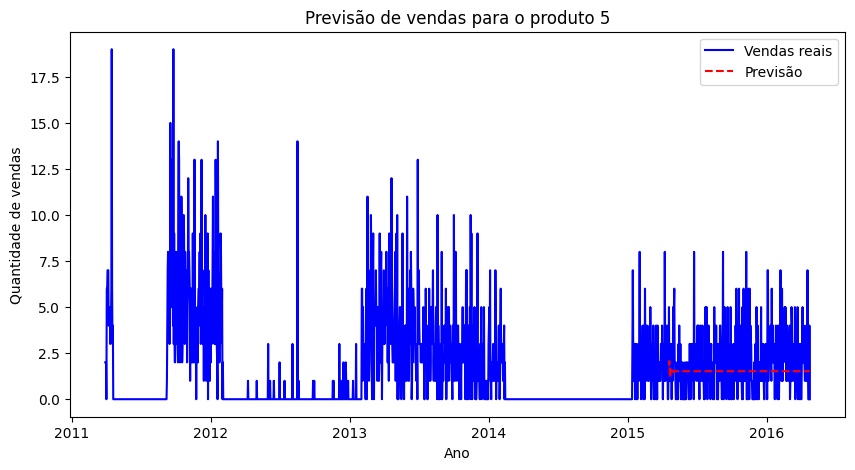

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


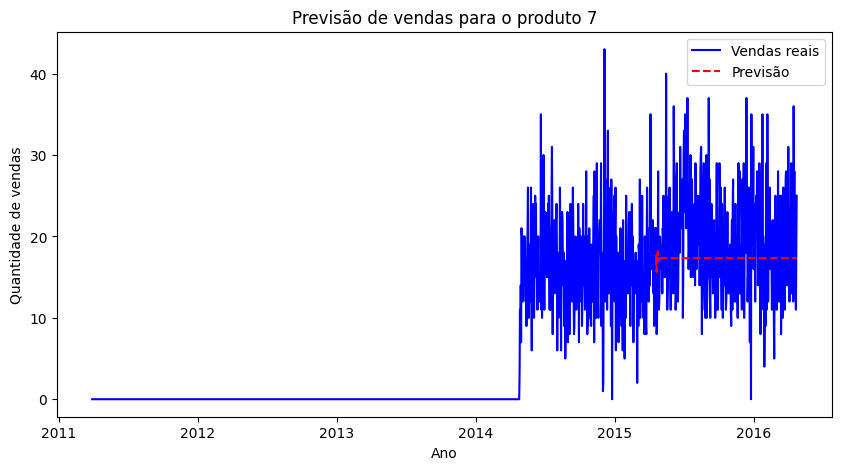

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


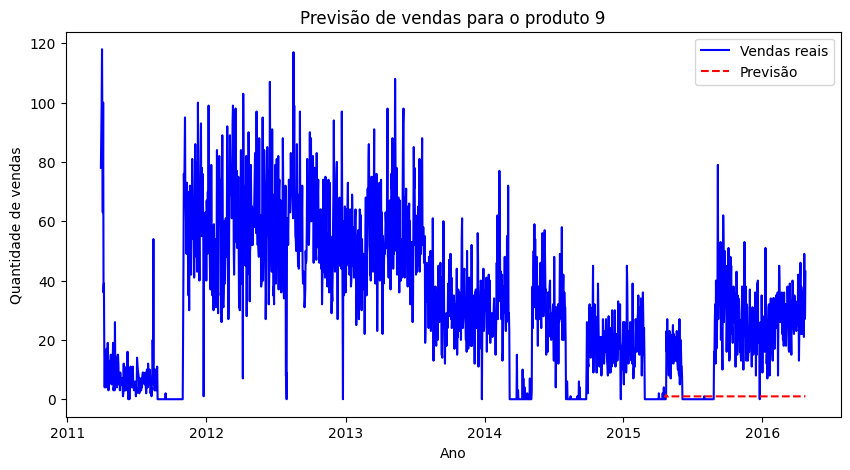

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


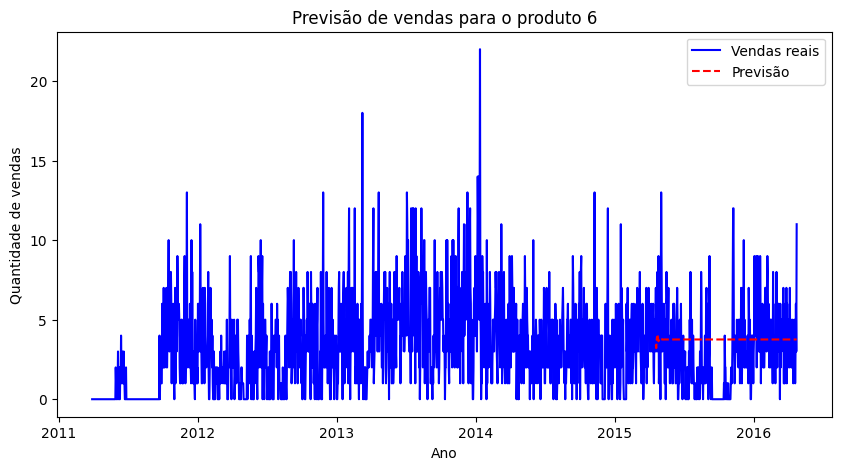

In [46]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model_fit = ARIMA(train, order=(5, 1, 0)).fit()

    forecast = model_fit.forecast(steps=len(test))

    plt.figure(figsize=(10, 5))
    plt.plot(item_data, label='Vendas reais', color='blue')
    plt.plot(test.index, forecast, label='Previsão', color='red', linestyle='--')
    plt.title(f'Previsão de vendas para o produto {item_id}')
    plt.xlabel('Ano')
    plt.ylabel('Quantidade de vendas')
    plt.legend()
    plt.show()

### Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [48]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)

    real_non_zero = real[real != 0]
    predicted_non_zero = predicted[real != 0]

    if len(real_non_zero) > 0:
        mape = np.mean(np.abs((real_non_zero - predicted_non_zero) / real_non_zero)) * 100
    else:
        mape = None

    nmae = mae / np.mean(real_non_zero) if np.mean(real_non_zero) != 0 else None

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "NMAE": nmae,
        "MSE": mse
    }

selected_products = data['item_id'].unique()[:10]

results = []

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model_fit = ARIMA(train, order=(5, 1, 0)).fit()

    forecast = model_fit.forecast(steps=len(test))

    metrics = calculate_metrics(test, forecast)
    metrics['item_id'] = item_id

    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

         MAE       RMSE        MAPE      NMAE          MSE  item_id
0  28.918805  36.873732  236.047729  0.477027  1359.672107        8
1   4.184491   4.947474  139.899247  0.600902    24.477503        0
2   2.909625   3.792350   76.621052  0.439898    14.381917        1
3   1.761682   2.392030   66.475691  0.520176     5.721809        2
4   1.996143   2.985615   62.472524  0.603540     8.913896        3
5   2.358491   3.821841  100.000000  0.566038    14.606469        4
6   1.333056   1.753047   46.500057  0.536452     3.073175        5
7   5.184188   6.610810   29.025147  0.272310    43.702807        7
8  19.173030  23.710860   94.869013  0.745501   562.204887        9
9   2.196670   2.628790   81.800795  0.592447     6.910535        6


##Holt-Winter

Vamos realizar a previsão da série de tempo dos 10 produtos diferentes usando Holt-Winter

In [49]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)

    real_non_zero = real[real != 0]
    predicted_non_zero = predicted[real != 0]

    if len(real_non_zero) > 0:
        mape = np.mean(np.abs((real_non_zero - predicted_non_zero) / real_non_zero)) * 100
    else:
        mape = None

    nmae = mae / np.mean(real_non_zero) if np.mean(real_non_zero) != 0 else None

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "NMAE": nmae,
        "MSE": mse
    }

selected_products = data['item_id'].unique()[:10]

results = []

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model_fit = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

    forecast = model_fit.forecast(steps=len(test))

    metrics = calculate_metrics(test, forecast)
    metrics['item_id'] = item_id
    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

         MAE       RMSE        MAPE      NMAE          MSE  item_id
0  30.976462  39.637480  272.458931  0.510968  1571.129782        8
1   3.391361   4.129512  100.292811  0.487007    17.052873        0
2   2.776065   3.863513   54.049973  0.419705    14.926731        1
3   1.722971   2.384500   55.531301  0.508745     5.685839        2
4   1.875916   2.607984   53.277837  0.567189     6.801582        3
5   3.041329   4.194725  122.291308  0.729919    17.595716        4
6   1.308951   1.729675   47.928277  0.526751     2.991776        5
7   4.868539   6.076690   31.149087  0.255730    36.926167        7
8  29.298639  34.538135  151.362527  1.139213  1192.882773        9
9   2.472872   2.899702  102.139780  0.666939     8.408271        6


###Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [50]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)

    real_non_zero = real[real != 0]
    predicted_non_zero = predicted[real != 0]

    if len(real_non_zero) > 0:
        mape = np.mean(np.abs((real_non_zero - predicted_non_zero) / real_non_zero)) * 100
    else:
        mape = None

    nmae = mae / np.mean(real_non_zero) if np.mean(real_non_zero) != 0 else None

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "NMAE": nmae,
        "MSE": mse
    }


selected_products = data['item_id'].unique()[:10]

results = []

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    train_size = int(len(item_data) * 0.8)
    train, test = item_data[:train_size], item_data[train_size:]

    model_fit = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=7).fit()

    forecast = model_fit.forecast(steps=len(test))

    metrics = calculate_metrics(test, forecast)
    metrics['item_id'] = item_id

    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dat

         MAE       RMSE        MAPE      NMAE          MSE  item_id
0  30.976462  39.637480  272.458931  0.510968  1571.129782        8
1   3.391361   4.129512  100.292811  0.487007    17.052873        0
2   2.776065   3.863513   54.049973  0.419705    14.926731        1
3   1.722971   2.384500   55.531301  0.508745     5.685839        2
4   1.875916   2.607984   53.277837  0.567189     6.801582        3
5   3.041329   4.194725  122.291308  0.729919    17.595716        4
6   1.308951   1.729675   47.928277  0.526751     2.991776        5
7   4.868539   6.076690   31.149087  0.255730    36.926167        7
8  29.298639  34.538135  151.362527  1.139213  1192.882773        9
9   2.472872   2.899702  102.139780  0.666939     8.408271        6


## Regressão linear multivariada

Utilize a regressão linear multivariada para realizar a previsão da série de tempo.

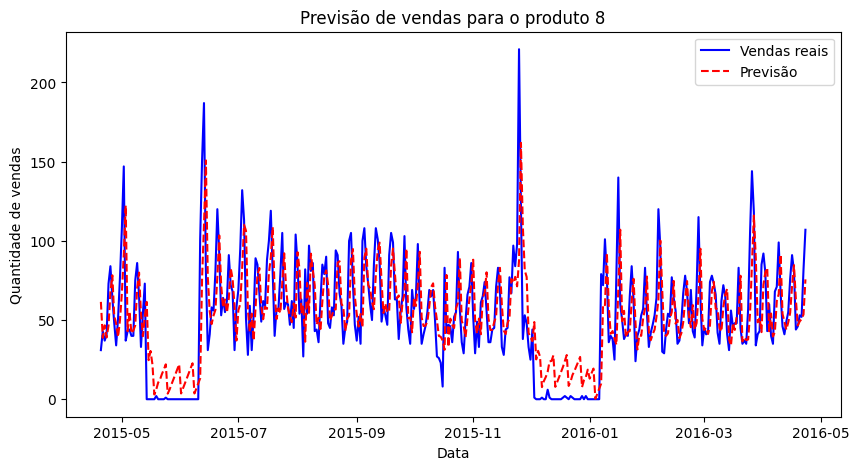

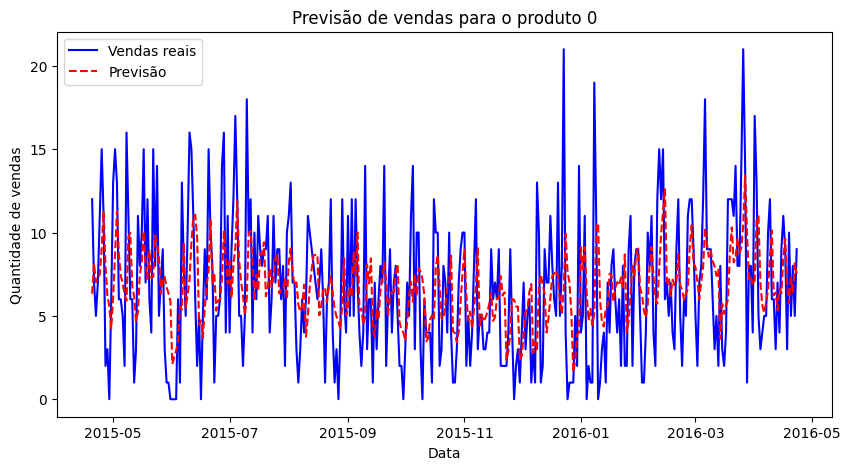

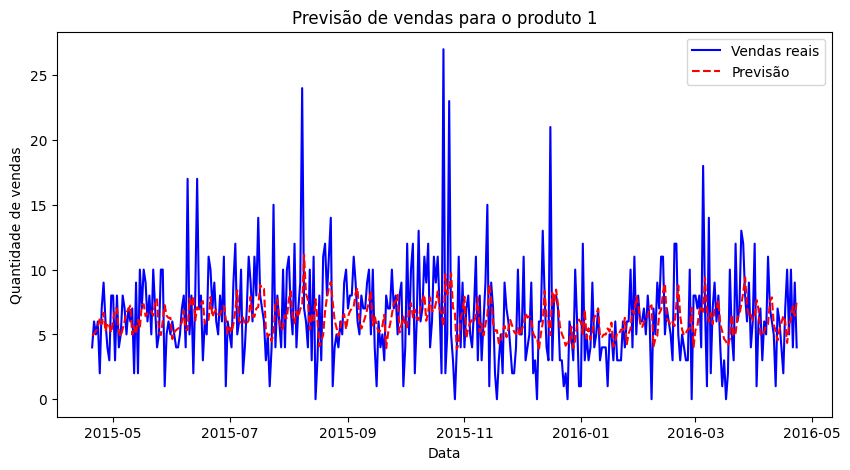

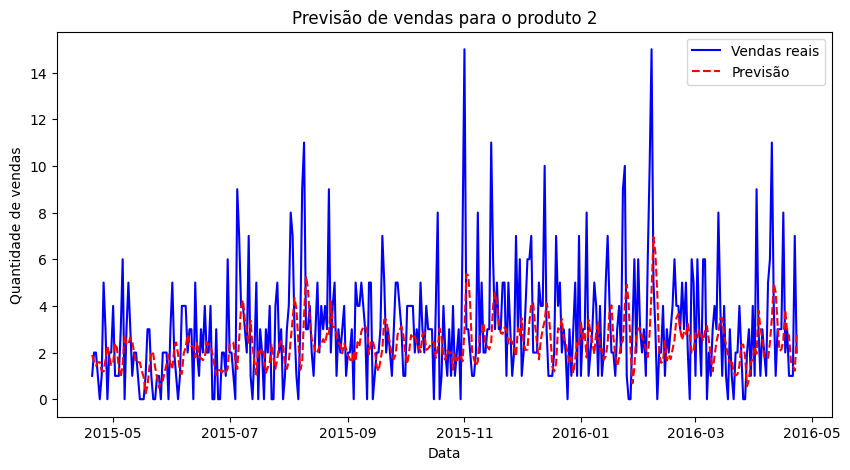

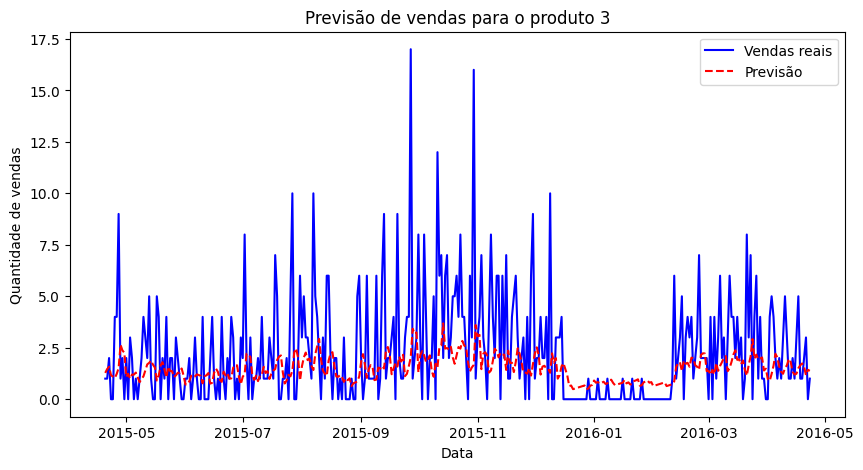

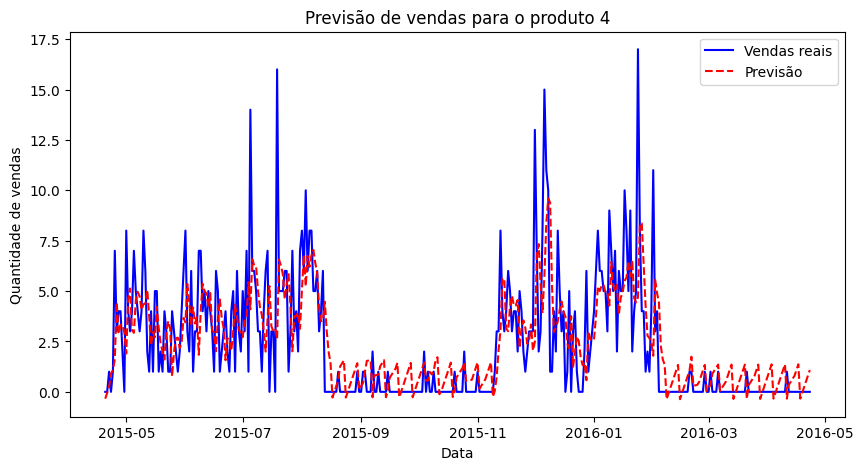

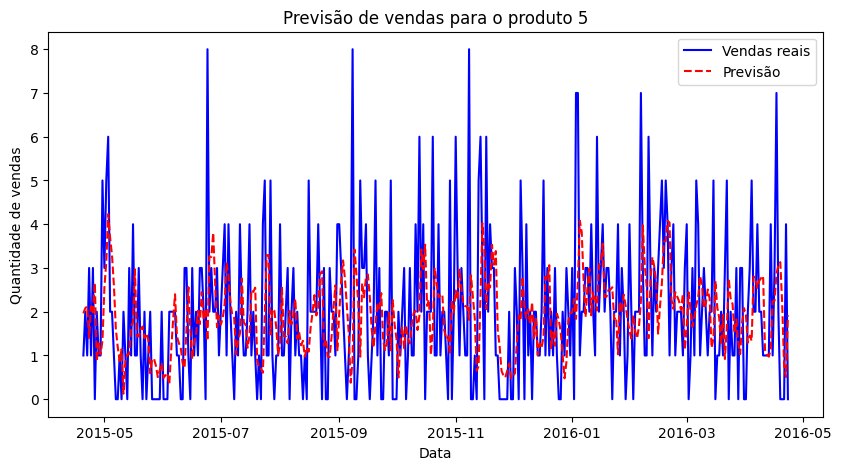

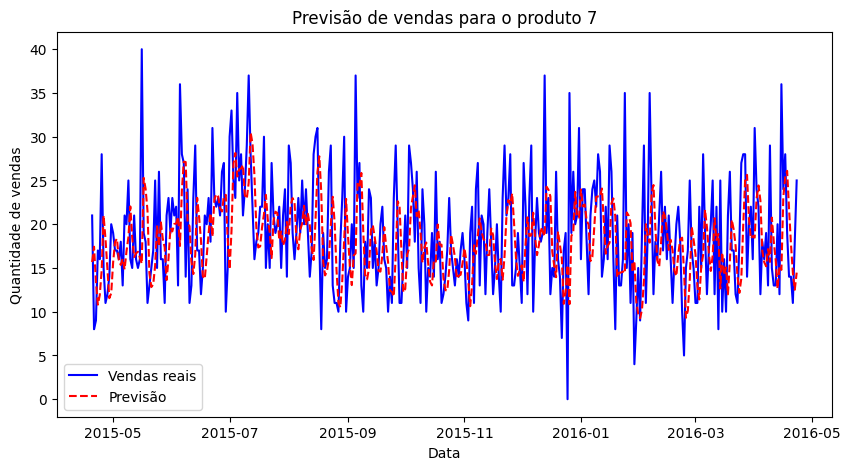

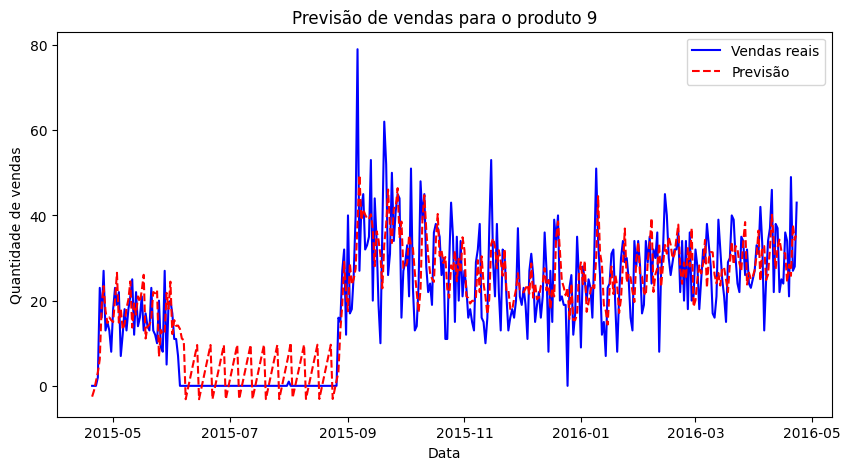

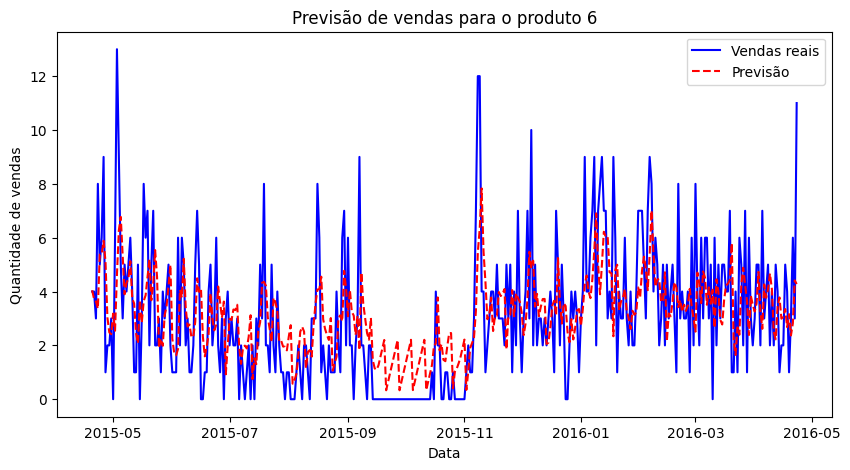

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    df = pd.DataFrame(item_data)
    df['lag_1'] = df['sale_qty'].shift(1)
    df['lag_2'] = df['sale_qty'].shift(2)
    df['lag_3'] = df['sale_qty'].shift(3)

    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    df.dropna(inplace=True)

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    X_train = train[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_train = train['sale_qty']
    X_test = test[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_test = test['sale_qty']

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(test.index, y_test, label='Vendas reais', color='blue')
    plt.plot(test.index, predictions, label='Previsão', color='red', linestyle='--')
    plt.title(f'Previsão de vendas para o produto {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade de vendas')
    plt.legend()
    plt.show()



### Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [53]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)

    real_non_zero = real[real != 0]
    predicted_non_zero = predicted[real != 0]

    if len(real_non_zero) > 0:
        mape = np.mean(np.abs((real_non_zero - predicted_non_zero) / real_non_zero)) * 100
    else:
        mape = None

    nmae = mae / np.mean(real_non_zero) if np.mean(real_non_zero) != 0 else None

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "NMAE": nmae,
        "MSE": mse
    }

selected_products = data['item_id'].unique()[:10]

results = []

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    df = pd.DataFrame(item_data)
    df['lag_1'] = df['sale_qty'].shift(1)
    df['lag_2'] = df['sale_qty'].shift(2)
    df['lag_3'] = df['sale_qty'].shift(3)

    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    df.dropna(inplace=True)

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    X_train = train[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_train = train['sale_qty']
    X_test = test[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_test = test['sale_qty']

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    metrics = calculate_metrics(y_test, predictions)
    metrics['item_id'] = item_id

    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)


         MAE       RMSE       MAPE      NMAE         MSE  item_id
0  18.244352  24.606649  89.436395  0.301202  605.487166        8
1   3.134800   3.954673  83.215438  0.449989   15.639440        0
2   2.783920   3.777879  64.811334  0.420609   14.272373        1
3   1.858521   2.527513  59.697137  0.548089    6.388323        2
4   1.775337   2.631368  53.375094  0.537854    6.924099        3
5   1.525836   2.330051  69.713730  0.366201    5.429137        4
6   1.409181   1.811426  61.596215  0.569019    3.281266        5
7   5.555286   7.055443  32.217307  0.291635   49.779278        7
8   6.973151   9.023056  40.171090  0.271136   81.415535        9
9   1.711576   2.159347  63.928618  0.462955    4.662778        6


## Outros modelos de regressão

Utilize algum outro modelo de regressão multivariado para realizar a previsão da série de tempo. Tente bater as métricas de erro dos modelos anteriores. Caso esteja dificil experimente trocar a série de tempo analisa entre alguma das outras 10 séries.

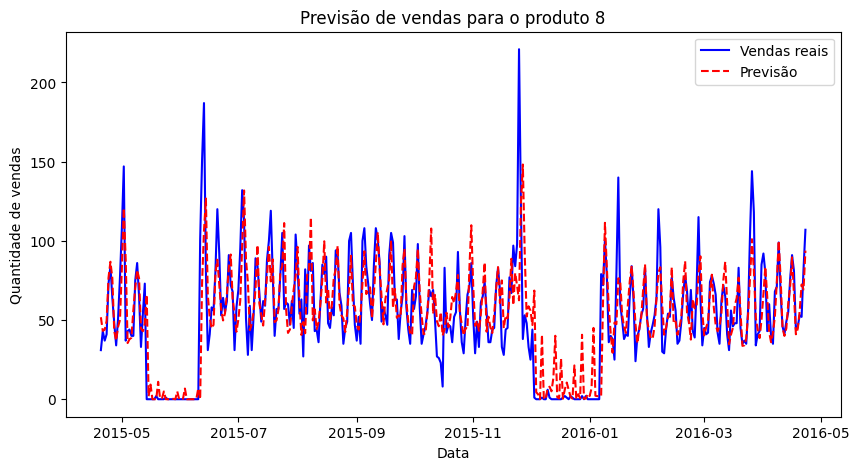

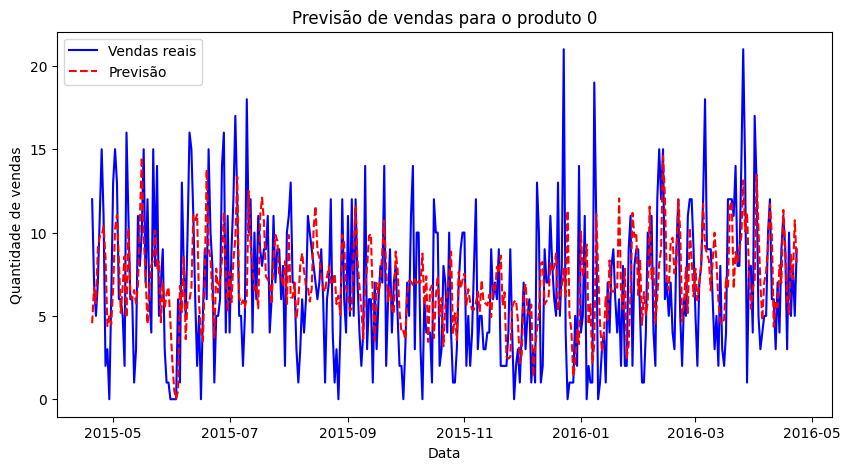

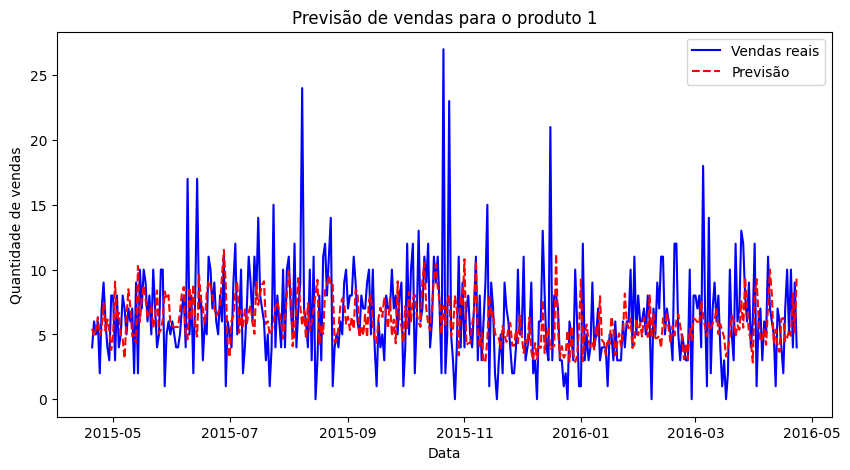

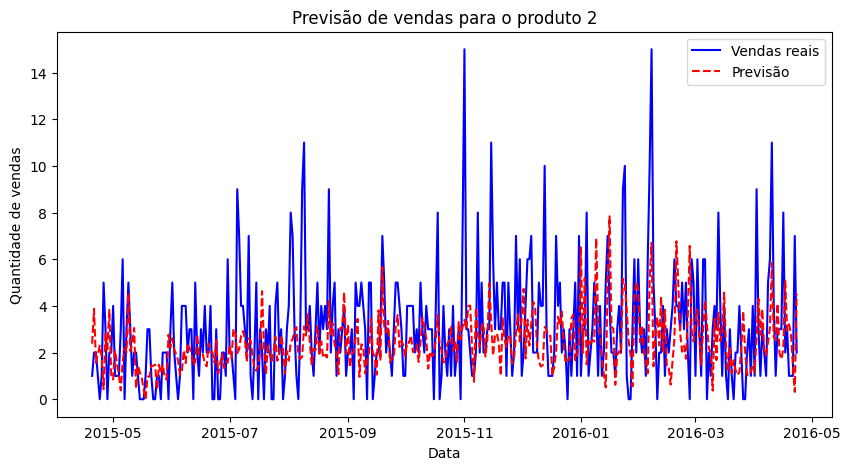

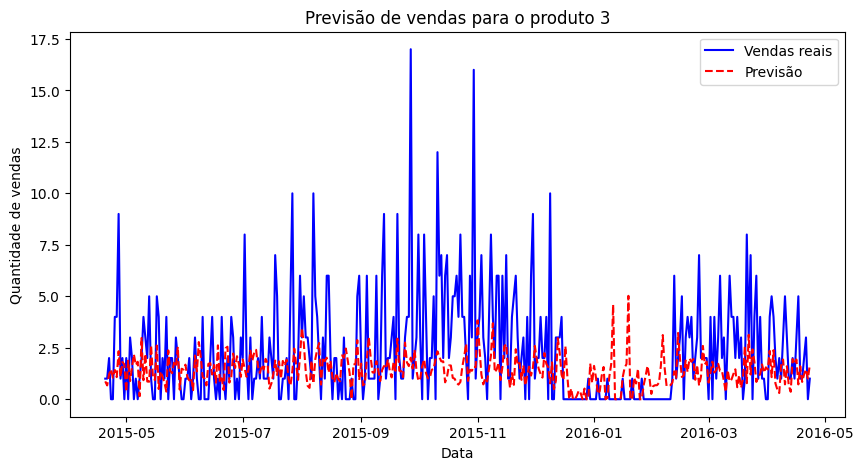

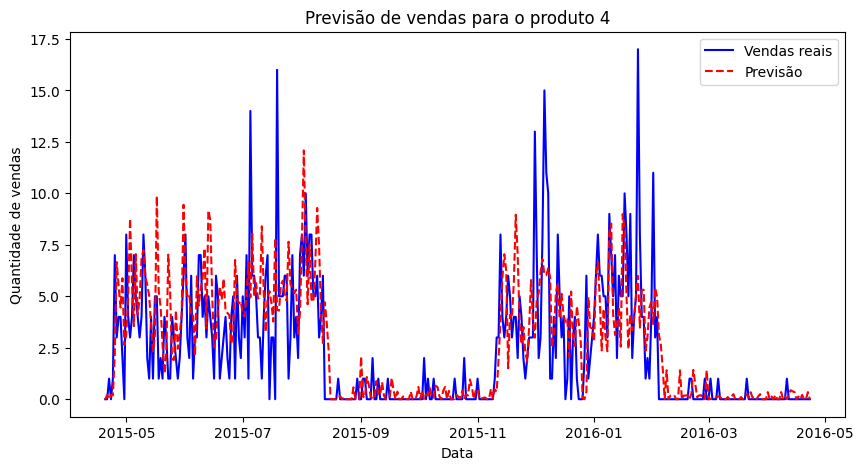

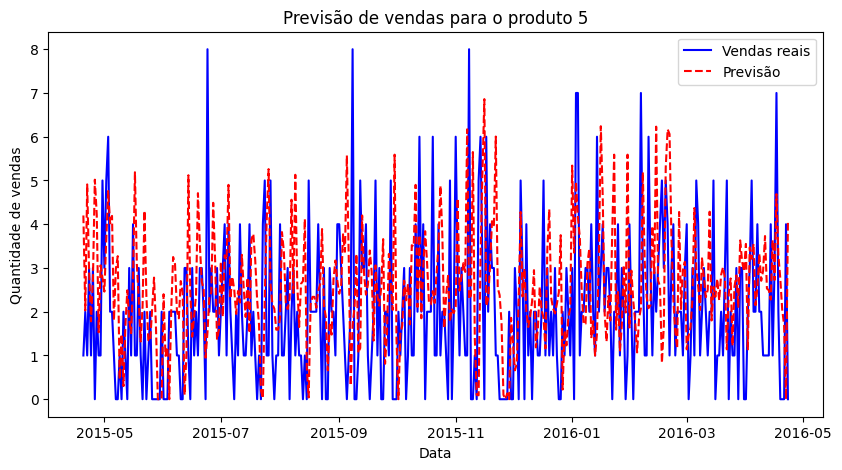

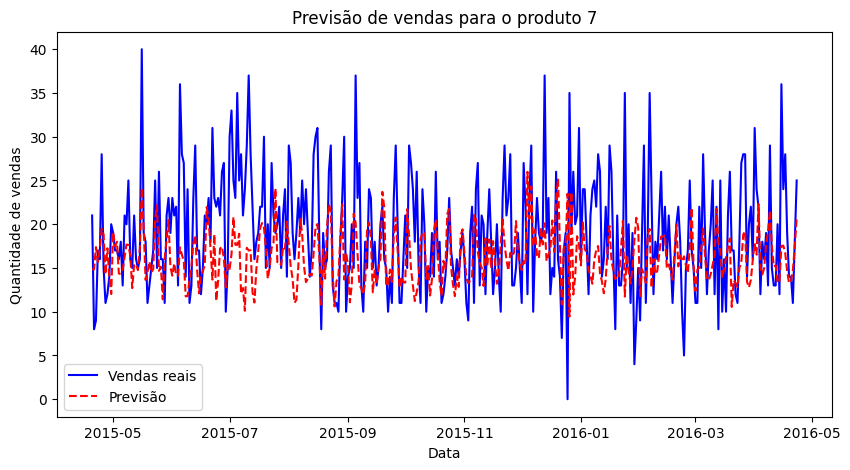

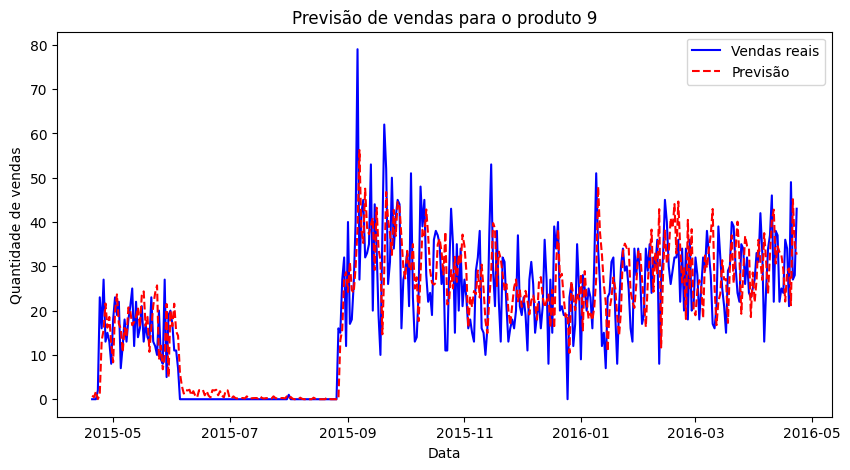

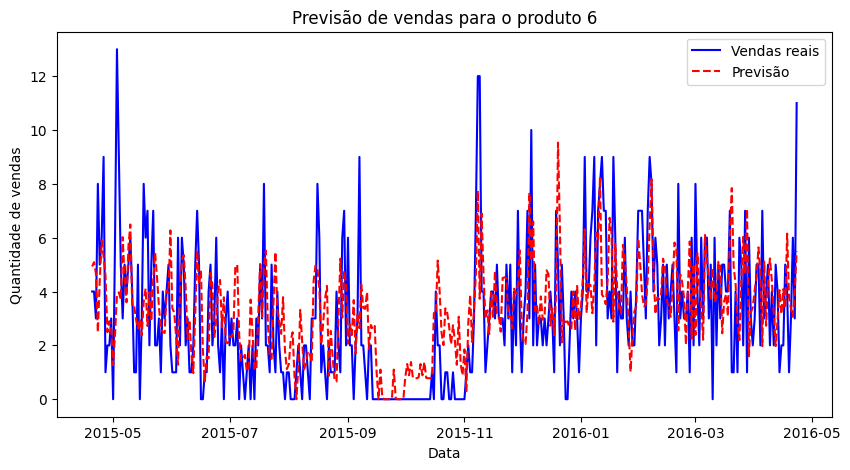

In [55]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    df = pd.DataFrame(item_data)
    df['lag_1'] = df['sale_qty'].shift(1)
    df['lag_2'] = df['sale_qty'].shift(2)
    df['lag_3'] = df['sale_qty'].shift(3)

    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    df.dropna(inplace=True)

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    X_train = train[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_train = train['sale_qty']
    X_test = test[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_test = test['sale_qty']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(test.index, y_test, label='Vendas reais', color='blue')
    plt.plot(test.index, predictions, label='Previsão', color='red', linestyle='--')
    plt.title(f'Previsão de vendas para o produto {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade de vendas')
    plt.legend()
    plt.show()



###Métricas de erro

Gere as seguintes métricas de erro comparando o realizado com o previsto pelo modelo: MAE, RMSE, MAPE (caso hajam valores zerados, usar NMAE ou trocar de série) e MSE.

In [57]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def calculate_metrics(real, predicted):
    mae = mean_absolute_error(real, predicted)
    mse = mean_squared_error(real, predicted)
    rmse = np.sqrt(mse)

    real_non_zero = real[real != 0]
    predicted_non_zero = predicted[real != 0]

    if len(real_non_zero) > 0:
        mape = np.mean(np.abs((real_non_zero - predicted_non_zero) / real_non_zero)) * 100
    else:
        mape = None

    nmae = mae / np.mean(real_non_zero) if np.mean(real_non_zero) != 0 else None

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE": mape,
        "NMAE": nmae,
        "MSE": mse
    }

selected_products = data['item_id'].unique()[:10]

results = []

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    df = pd.DataFrame(item_data)
    df['lag_1'] = df['sale_qty'].shift(1)
    df['lag_2'] = df['sale_qty'].shift(2)
    df['lag_3'] = df['sale_qty'].shift(3)

    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    df.dropna(inplace=True)

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    X_train = train[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_train = train['sale_qty']
    X_test = test[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_test = test['sale_qty']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    metrics = calculate_metrics(y_test, predictions)
    metrics['item_id'] = item_id

    results.append(metrics)

results_df = pd.DataFrame(results)
print(results_df)

         MAE       RMSE       MAPE      NMAE         MSE  item_id
0  13.805514  21.910763  72.857653  0.227920  480.081518        8
1   3.255651   4.105228  85.502835  0.467337   16.852895        0
2   2.889749   3.951723  65.294185  0.436598   15.616111        1
3   1.818218   2.407975  59.594043  0.536204    5.798345        2
4   1.845952   2.715936  57.292922  0.559247    7.376310        3
5   1.528082   2.420220  90.032671  0.366740    5.857464        4
6   1.708150   2.165080  87.015249  0.689741    4.687571        5
7   5.289676   6.920308  27.673477  0.277691   47.890667        7
8   7.088771   9.879373  44.184530  0.275631   97.602008        9
9   1.806319   2.342030  74.499961  0.488581    5.485104        6


##Vizualização de dados

Vamos vizualizar as previsões com o realizado. Mostre usando Matplotlib ou mesmo Seaborn a comparação entre as previsões feitas por você neste exercício e o realizado (y_test). Caso queira e ache interessa, gere outros tipos de gráficos que ajudem a justicar a discussão a seguir.

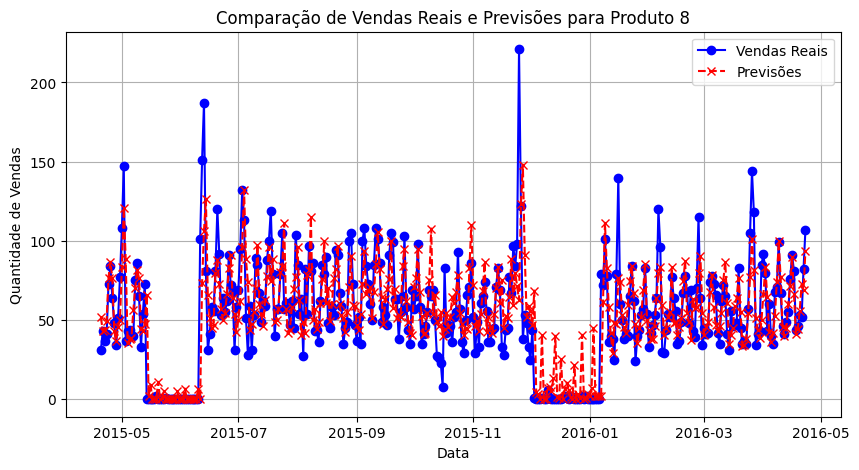

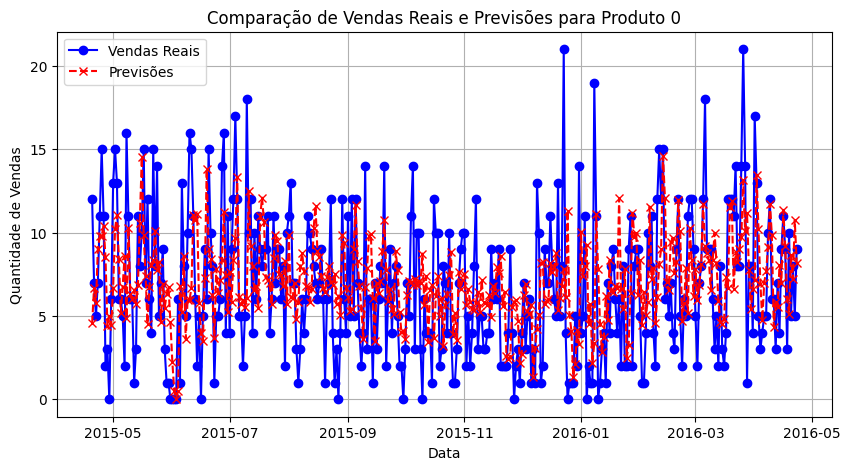

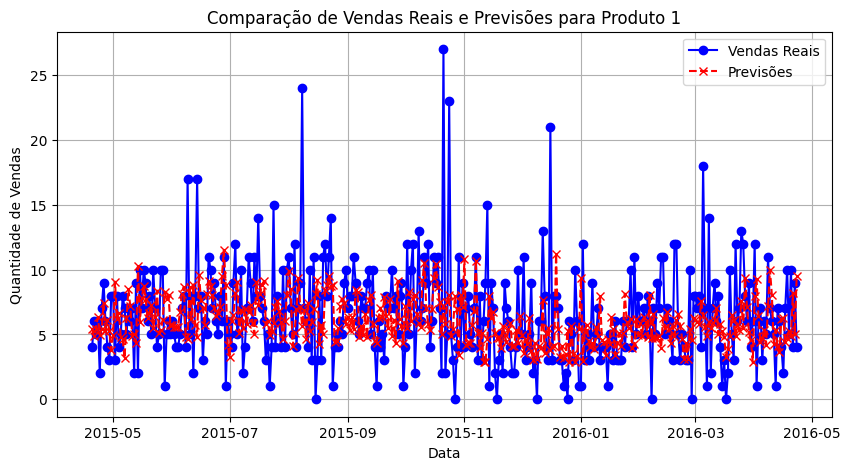

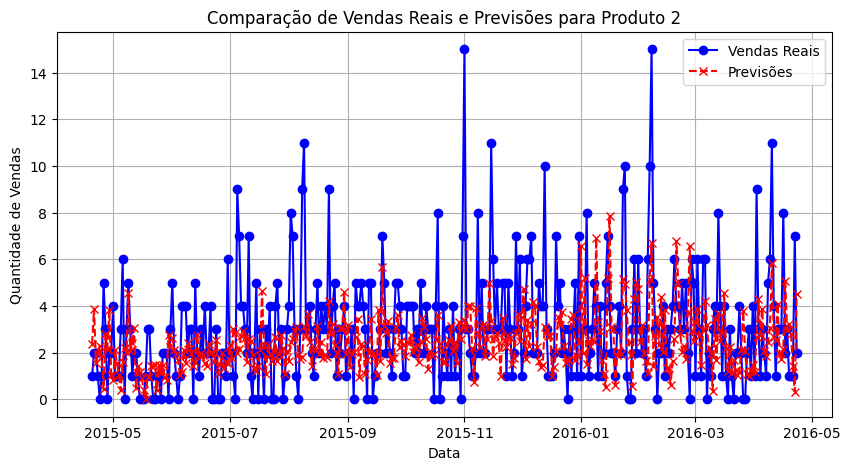

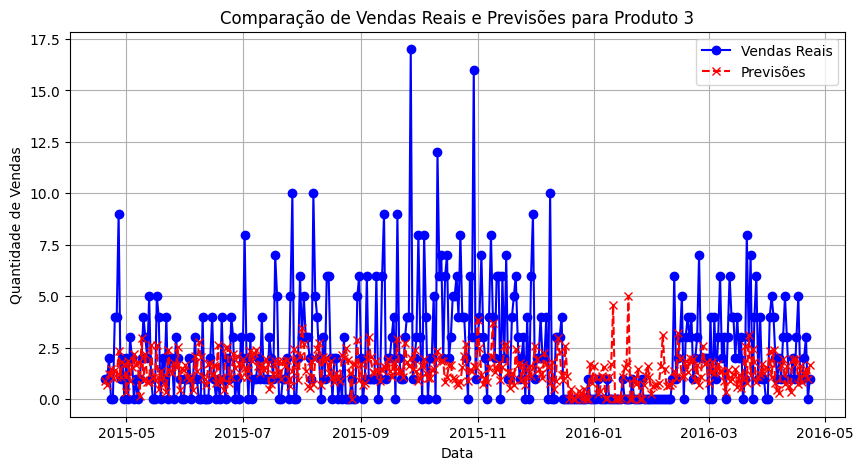

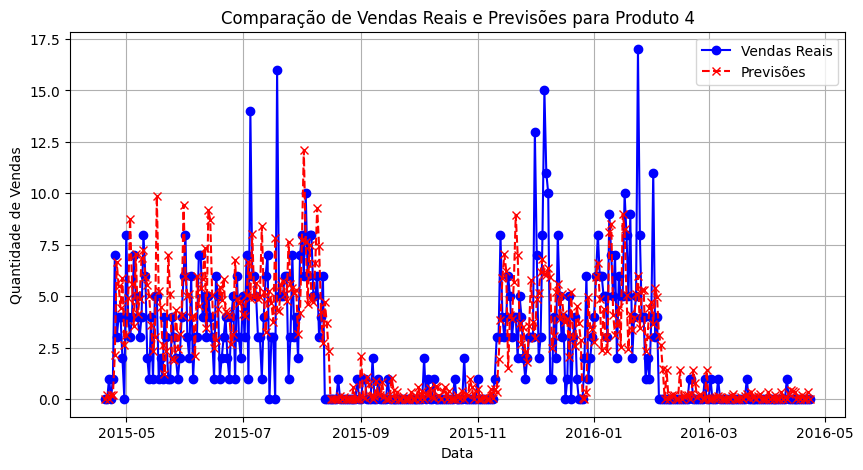

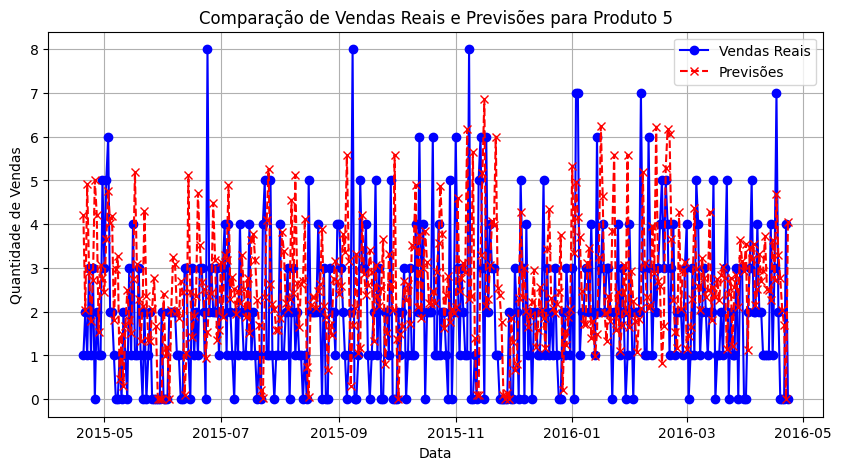

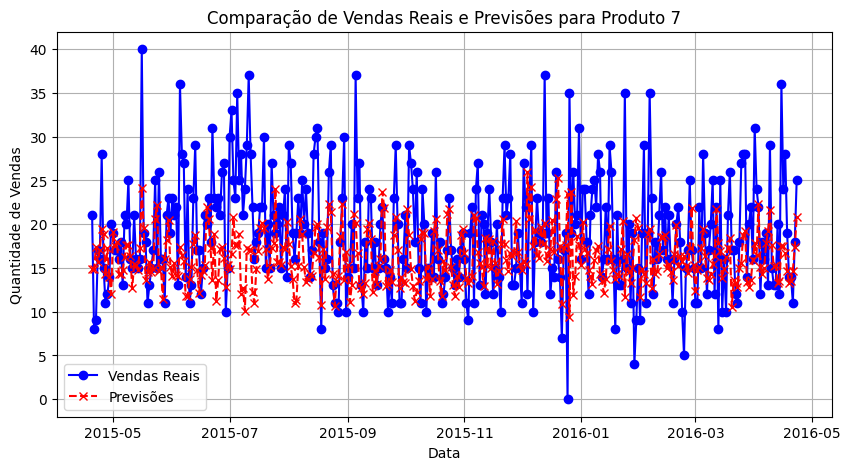

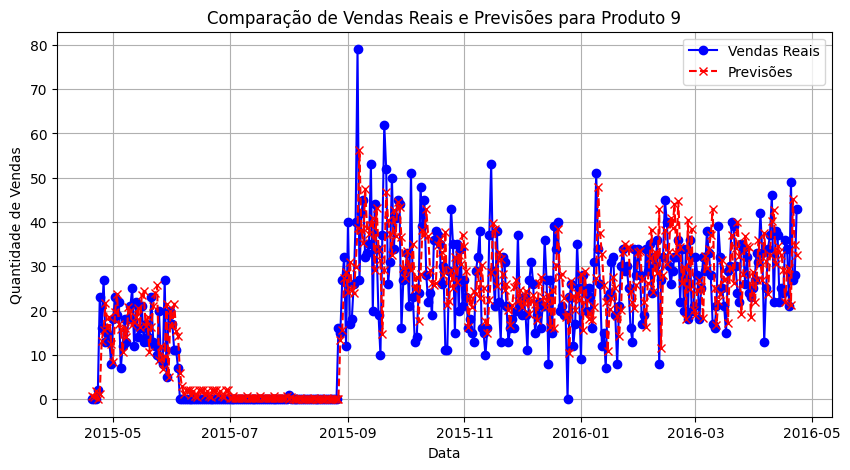

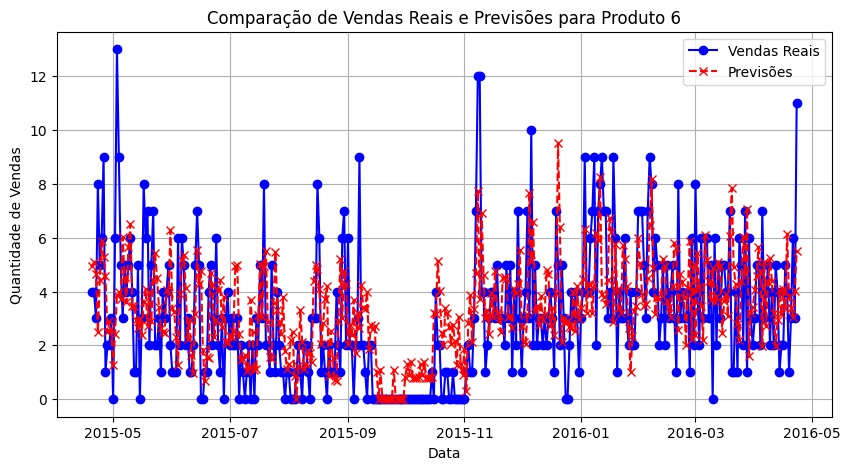

In [58]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

selected_products = data['item_id'].unique()[:10]

for item_id in selected_products:

    item_data = data[data['item_id'] == item_id].groupby('date')['sale_qty'].sum()
    item_data.index = pd.to_datetime(item_data.index)
    item_data = pd.to_numeric(item_data, errors='coerce').fillna(0)

    df = pd.DataFrame(item_data)
    df['lag_1'] = df['sale_qty'].shift(1)
    df['lag_2'] = df['sale_qty'].shift(2)
    df['lag_3'] = df['sale_qty'].shift(3)

    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month

    df.dropna(inplace=True)

    train_size = int(len(df) * 0.8)
    train, test = df.iloc[:train_size], df.iloc[train_size:]

    X_train = train[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_train = train['sale_qty']
    X_test = test[['lag_1', 'lag_2', 'lag_3', 'day_of_week', 'month']]
    y_test = test['sale_qty']

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    plt.figure(figsize=(10, 5))
    plt.plot(test.index, y_test, label='Vendas Reais', color='blue', marker='o')
    plt.plot(test.index, predictions, label='Previsões', color='red', linestyle='--', marker='x')
    plt.title(f'Comparação de Vendas Reais e Previsões para Produto {item_id}')
    plt.xlabel('Data')
    plt.ylabel('Quantidade de Vendas')
    plt.legend()
    plt.grid(True)
    plt.show()


##Discussão

Usando os resultados obtidos e os gráfico(s) gerados, gere uma discussão (pelo menos 2 parágrafos com mais de 5 linhas cada) que descreva os resultado obtidos e dê possíveis causas para que um determinado modelo tenha desempenhado melhor do que outros. Caso ache interessante, comente o resultado obtido para outras séries de tempo testada entre as 10 disponíveis.

Algumas possíveis perguntas que podem ajudar na elaboração da discussão:

1) Ao utilizar multivariaveis, houve algum ganho nas métricas de erros dos modelos linear e o modelo escolhido?

2) Quais foram as váriaveis que mais trouxeram informações para o modelo?

3) Quais sugestões de outro possíveis modelos e tratamento de dados par que possamos melhorar o desempenho dos modelos?

4) Como foram os resultados de todos os modelos no geral?

5) Entre os modelos que foram pior, qual você acredita que tenha sido a causa?


Os resultados mostraram que o modelo rnadom forest foi melhor que o de regressão linear na hora de prever as séries. Enquanto a regressão ficou um pouco engessada, assumindo que tudo tinha uma relação linear, a random conseguiu pegar padrões mais complexos e lidar bem com as variações não lineares e os comportamentos sazonais. Isso ficou ainda mais claro, nas métricas de erro, com valores menos de MAE, RMSE E MSE, indicando que as previsões bateram mais próximo dos valores reais. a Flexibilidade da random para explorar diferentes combinações de variáveis ajudou a deixar as previsões mais certeiras.

Usar variáveis multivariadas, como lags de venda e dados de calendário, foi essencial para capturar os padrões que se repetem, ajudando bastante o desempenho dos modelos. Mesmo assim, a randodo ainda teve dificuldade de prever picos muitos altos ou quedas brucas nas vendas, mostrando que talvez seja preciso incluir outras variáveis, como eventos especiais e promoções.

#Como entregar o Exercício?

Gostaria que cada um de vocês compartilhassem comigo o código no colab.

Caso tenham dificuldades me avise. Na pior da hipóteses, apenas apresentem o pdf que é a impressão do notebook (não é a melhor opção).